<a href="https://colab.research.google.com/github/Gourab-997/data-analytics-portfolio/blob/main/yulu_case_study_by_Gourab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

csv_path = "bike_sharing.csv"
df = pd.read_csv(csv_path, delimiter=",")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.shape

(10886, 12)

In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['season'] = df['season'].astype('object')
df['holiday'] = df['holiday'].astype('object')
df['workingday'] = df['workingday'].astype('object')
df['weather'] = df['weather'].astype('object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [ ]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
# Specifying columns
cat = ["season","holiday","workingday","weather"]
num = ["temp","atemp","humidity","windspeed","casual","registered","count"]



## Univariate Analysis

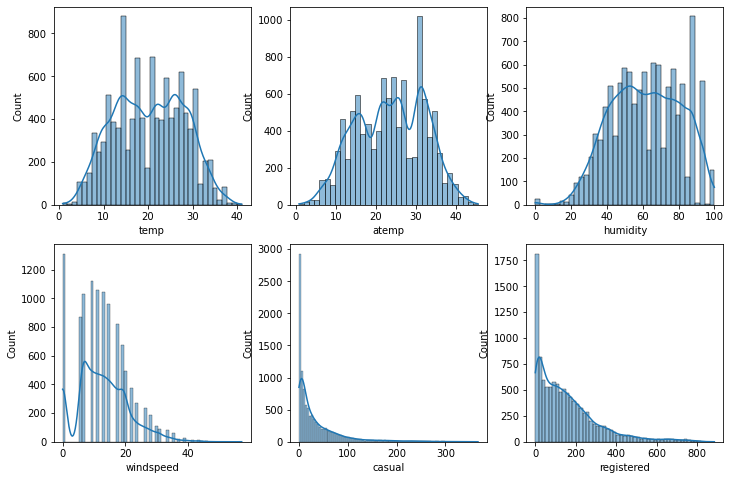

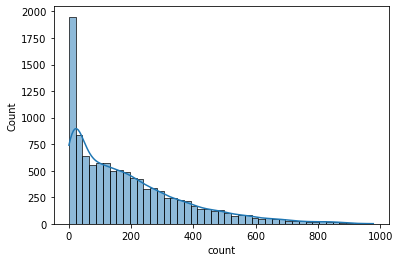

In [ ]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

index = 0
for row in range(2):
    for col in range(3):
        sns.histplot(df[num[index]], ax=axis[row, col], kde=True)
        index += 1

plt.show()
sns.histplot(df[num[-1]], kde=True)
plt.show()

### Outlier Detection

C:\Users\newgo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\newgo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\newgo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\newgo\anaconda3\lib\si

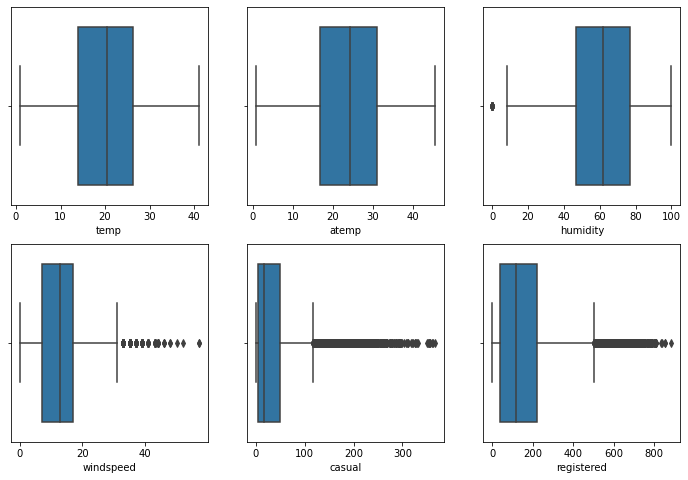

C:\Users\newgo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


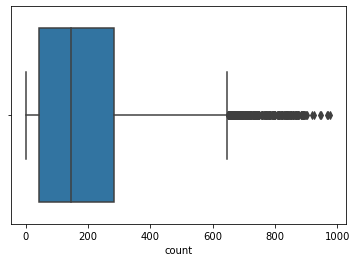

In [ ]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

index = 0
for row in range(2):
    for col in range(3):
        sns.boxplot(df[num[index]], ax=axis[row, col])
        index += 1

plt.show()
sns.boxplot(df[num[-1]])
plt.show()

### Scatter Plot for count distribution of each numeical variable

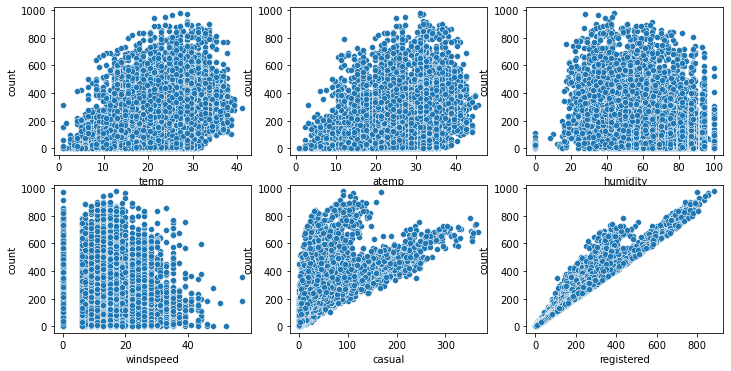

In [ ]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))

index = 0
for row in range(2):
    for col in range(3):
        sns.scatterplot(data=df, x=num[index], y='count', ax=axis[row, col])
        index += 1

plt.show()

### Heatmap

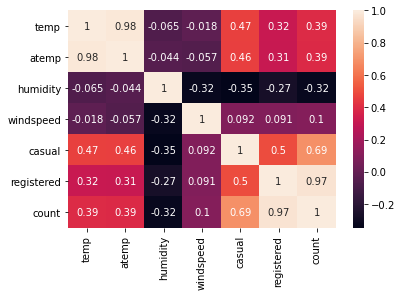

In [ ]:
df.corr()["count"]
sns.heatmap(df.corr(), annot=True)
plt.show()

### Categorical plot

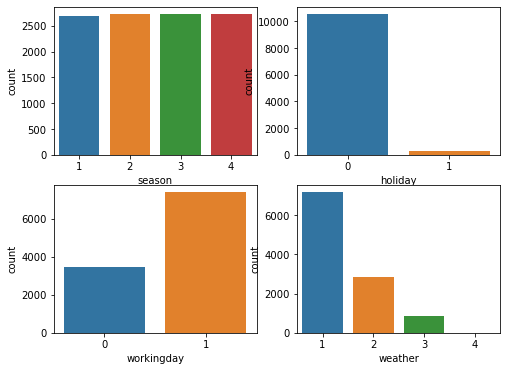

In [ ]:
# countplot of each categorical column
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

index = 0
for row in range(2):
    for col in range(2):
        sns.countplot(data=df, x=cat[index], ax=axis[row, col])
        index += 1

plt.show()

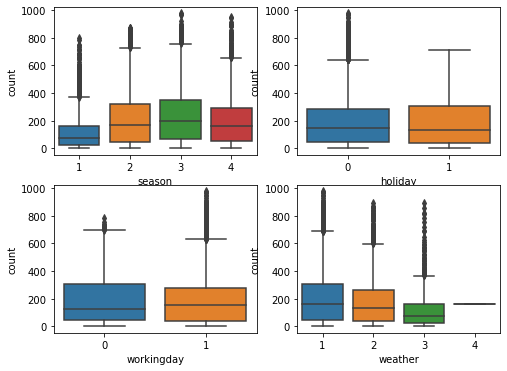

In [ ]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

index = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=df, x=cat[index],y='count', ax=axis[row, col])
        index += 1

plt.show()

In [ ]:
# Hypothesis: Weather and season are dependent on each other
from scipy.stats import chi2,chi2_contingency
# Create a contingency table
contingency_table = pd.crosstab(df['season'], df['weather'])
print("Observed values:")
contingency_table

Observed values:


weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [ ]:
# Perform the Chi-squared test

chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Calculate the critical value at a significance level of 0.05
alpha = 0.05
critical_value = chi2.ppf(1 - alpha, dof)

# Display the results
print("Chi-squared test statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)
print("Critical Value (at alpha = 0.05):", critical_value)

# Check the p-value
if p_val < 0.05:
    print("There is a significant association between weather and season.")
else:
    print("There is no significant association between the weather and season.")

Chi-squared test statistic: 49.158655596893624
P-value: 1.549925073686492e-07
Degrees of Freedom: 9
Critical Value (at alpha = 0.05): 16.918977604620448
There is a significant association between weather and season.


In [ ]:
# Convert the data to a NumPy array
from scipy.stats import ttest_ind
attribute_values = np.array(df['workingday'])

# Create two groups based on the attribute values (0 and 1)
group_0 = attribute_values[attribute_values == 0]
group_1 = attribute_values[attribute_values == 1]

# Perform a t-test
t_statistic, p_value = ttest_ind(group_0, group_1)

# Display the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("There is a significant difference between the two working day groups.")
else:
    print("There is no significant difference between the two workign day groups.")

T-statistic: -inf
P-value: 0.0
There is a significant difference between the two working day groups.


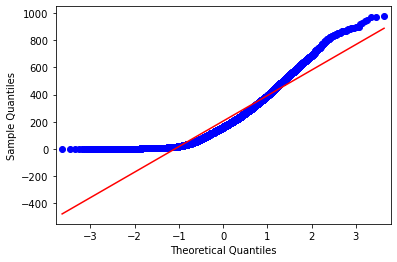

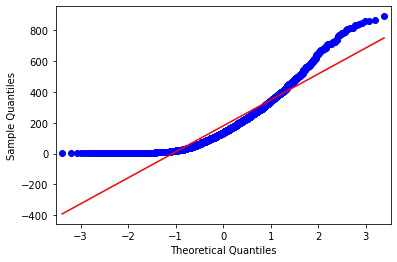

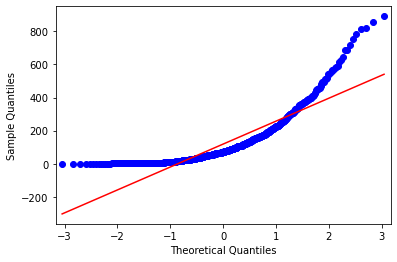

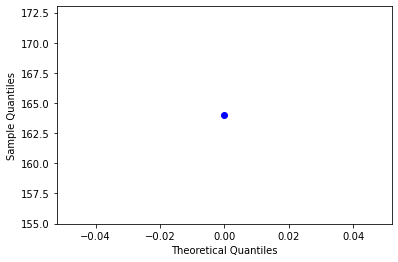

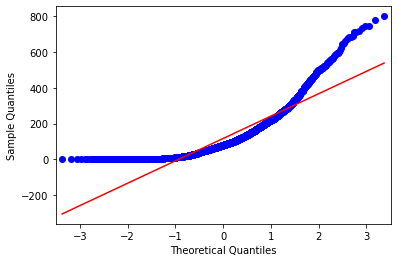

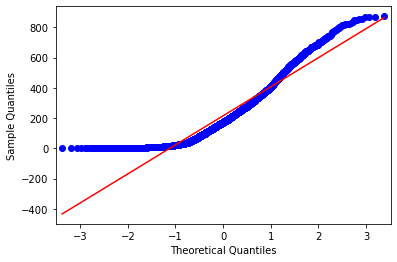

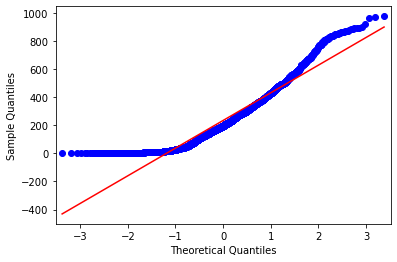

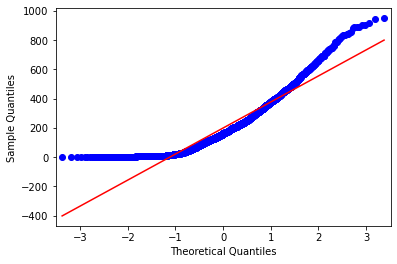

In [ ]:
# defining the data groups for the ANOVA
from statsmodels.graphics.gofplots import qqplot
gp1 = df[df['weather']==1]['count'].values
gp2 = df[df['weather']==2]['count'].values
gp3 = df[df['weather']==3]['count'].values
gp4 = df[df['weather']==4]['count'].values

gp5 = df[df['season']==1]['count'].values
gp6 = df[df['season']==2]['count'].values
gp7 = df[df['season']==3]['count'].values
gp8 = df[df['season']==4]['count'].values
groups=[gp1,gp2,gp3,gp4,gp5,gp6,gp7,gp8]

index = 0
for row in range(4):
    for col in range(2):
        qqplot(groups[index], line="s")
        index += 1

plt.show()


In [ ]:
# To perform annova, check first if the variances are equal
from scipy.stats import levene
# Perform Levene's test
statistic, p_value = levene(gp1,gp2,gp3,gp4,gp5,gp6,gp7,gp8)

# Display the results
print("Levene's Test Statistic:", statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("The variances are significantly different between the groups.")
else:
    print("The variances are not significantly different between the groups.")

Levene's Test Statistic: 102.5026306304148
P-value: 3.463531888897594e-148
The variances are significantly different between the groups.


In [ ]:
# Variances are not equal Perform Kruskal-Wallis test
from scipy.stats import kruskal
statistic, p_value = kruskal(gp1,gp2,gp3,gp4,gp5,gp6,gp7,gp8)

# Display the results
print("Kruskal-Wallis Test Statistic:", statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("The distributions are significantly different between the groups. Fail to reject null hypothesis")
else:
    print("The distributions are not significantly different between the groups.Reject Null hypothesis")

Kruskal-Wallis Test Statistic: 904.7105757287106
P-value: 4.614440933900297e-191
The distributions are significantly different between the groups.
